In [2]:
!pip install anaconda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for anaconda: filename=anaconda-0.0.1.1-py3-none-any.whl size=1124 sha256=759e564ae2298c6f97e21bb0b0202292a39b8f9d910a02ffa231de6d72685189
  Stored in directory: /root/.cache/pip/wheels/70/29/df/a691ce9377d2b9b8ad2659144a1c4c51c216f2d8037b72dbc2
Successfully built anaconda


In [3]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=sns.load_dataset('titanic')

data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


-DataFrame구성 

survived : 생존여부 , 

pclass : 티켓 클래스 (1,2,3), 

sex : 성별 (male ,female)

age : 나이 , 

sibsp : 자매나 남매의 수 , parch : 부모님이나 자녀의 수 , 

fare : 운임 ,

 embarked : 어떤 항구에서 탑승했는지 , 

 class : pclass를 영어로 옮겨놓은것. 

 who : sex를 man, woman으로 표시, 

 adult_male : 성인남자인지 아닌지.

deck : 호실 , 

embark_town : 탑승지의 풀네임. , 

alive : survived의 영어표시.

alone : 혼자 이냐?


In [9]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# 처음부터 800번까지의 데이터를 학습데이터로 사용하고, 나머지를 테스트데이터로 활용하여 모델간의 결과를 비교하여라.

In [3]:

X_train = data[:800]
X_test = data[800:]

print(len(X_train) , len(X_test))

800 91


- Pclass와 survived의 관계

In [12]:
X_train[['pclass','survived']].groupby(by='pclass',as_index = False).mean().sort_values(by='survived',ascending=False)

,pclass,survived
0,1,0.615385
1,2,0.481928
2,3,0.246014


- Sex와 survived의 관계

In [16]:
X_train[['sex','survived']].groupby(['sex']).mean().sort_values(by=['survived'],ascending=False)

,survived
sex,
female,0.745583
male,0.187621


- Parch와 survived의 관계

In [17]:
X_train[['parch','survived']].groupby(['parch']).mean().sort_values(by=['survived'],ascending=False)

,survived
parch,
2,0.527778
1,0.514851
3,0.500000
0,0.350163
5,0.250000
4,0.000000
6,0.000000


- SibSp와 survived의 관계

In [18]:
X_train[['sibsp','survived']].groupby(['sibsp']).mean().sort_values(by=['survived'],ascending=False)

,survived
sibsp,
1,0.518325
2,0.481481
0,0.348708
3,0.266667
4,0.200000
5,0.000000
8,0.000000


- age와 survived의 관계

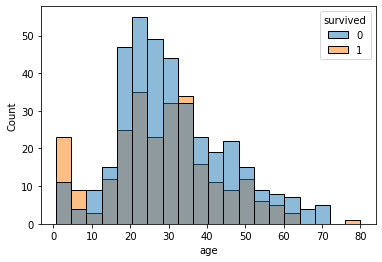

In [21]:
sns.histplot(X_train,x='age',bins=20,hue='survived')

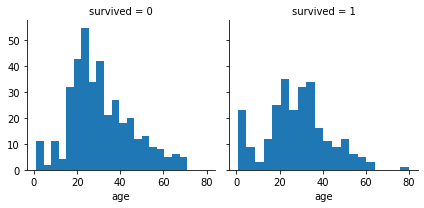

In [24]:
import matplotlib.pyplot as plt 
a= sns.FacetGrid(X_train,col='survived' )

a.map(plt.hist, 'age',bins=20)

- pclass에 따른 age별 survived 유무

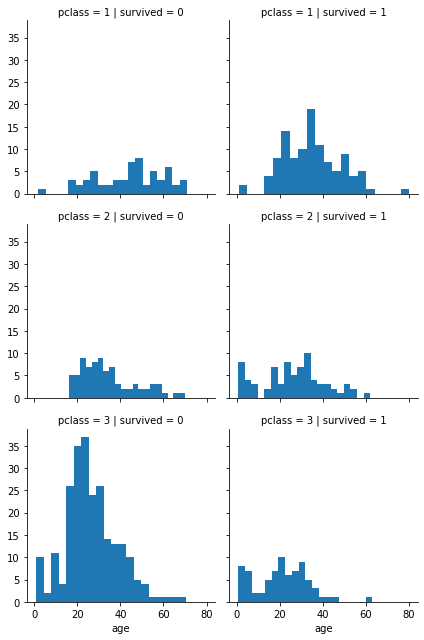

In [26]:
a= sns.FacetGrid(X_train, col = 'survived',row='pclass')

a.map(plt.hist, 'age',bins=20)

- 필요없는 필드 삭제

In [4]:
c_names = X_train.columns
c_names


X_train.drop(c_names[4:],axis=1,inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
tc_names = X_test.columns
X_test.drop(tc_names[4:],axis=1,inplace=True)

In [34]:
X_test

,survived,pclass,sex,age
800,0,2,male,34.00
801,1,2,female,31.00
802,1,1,male,11.00
803,1,3,male,0.42
804,1,3,male,27.00
...,...,...,...,...
886,0,2,male,27.00
887,1,1,female,19.00
888,0,3,female,NaN
889,1,1,male,26.00


- 결측값 확인

In [35]:
X_train.isnull().sum()

survived      0
pclass        0
sex           0
age         163
dtype: int64

In [36]:
X_test.isnull().sum()

survived     0
pclass       0
sex          0
age         14
dtype: int64

In [6]:
X_train['age']=X_train.groupby(by=['pclass']).age.transform(lambda x : x.fillna(x.mean()))
X_test['age']=X_test.groupby(by=['pclass']).age.transform(lambda x : x.fillna(x.mean()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


- 성별 인코딩

In [7]:
map_dict = {'female' : 0, 'male' : 1}

X_train['sex'] = X_train['sex'].map(map_dict).astype('int')
X_test['sex'] = X_test['sex'].map(map_dict).astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [64]:
X_train['sex'].dtype

dtype('int64')

- 나이 분류

In [8]:
def func1(x) :
  if x <20 :
    return 1
  elif x < 40 :
    return 2
  elif x<60 :
    return 3
  else :
    return 4
  

X_train['age'] = X_train['age'].apply(func1)
X_test['age'] = X_test['age'].apply(func1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [75]:
X_train.iloc[:,3].count()

800

# 머신러닝 모델 구성 및 결과 검증

In [10]:
from sklearn.tree import DecisionTreeClassifier

x_train = X_train.drop(['survived'],axis=1)

y_train = X_train['survived']

x_test = X_test.drop(['survived'],axis=1)

y_test = X_test['survived']

tree = DecisionTreeClassifier( )
tree.fit(x_train,y_train)

print(tree.score(x_train,y_train))
print(tree.score(x_test,y_test))



0.8
0.7692307692307693


In [81]:
pred=tree.predict(x_test)

y_test=list(y_test)

length=len(x_test)

len(x_test) == len(y_test)



True

In [83]:
score=0
for i in range(length) :
  if y_test[i] == pred[i] :
    score+=1
print('test_score : {:.2f}'.format(score/length))

test_score : 0.77


- graphviz를 통한 tree 시각화하기

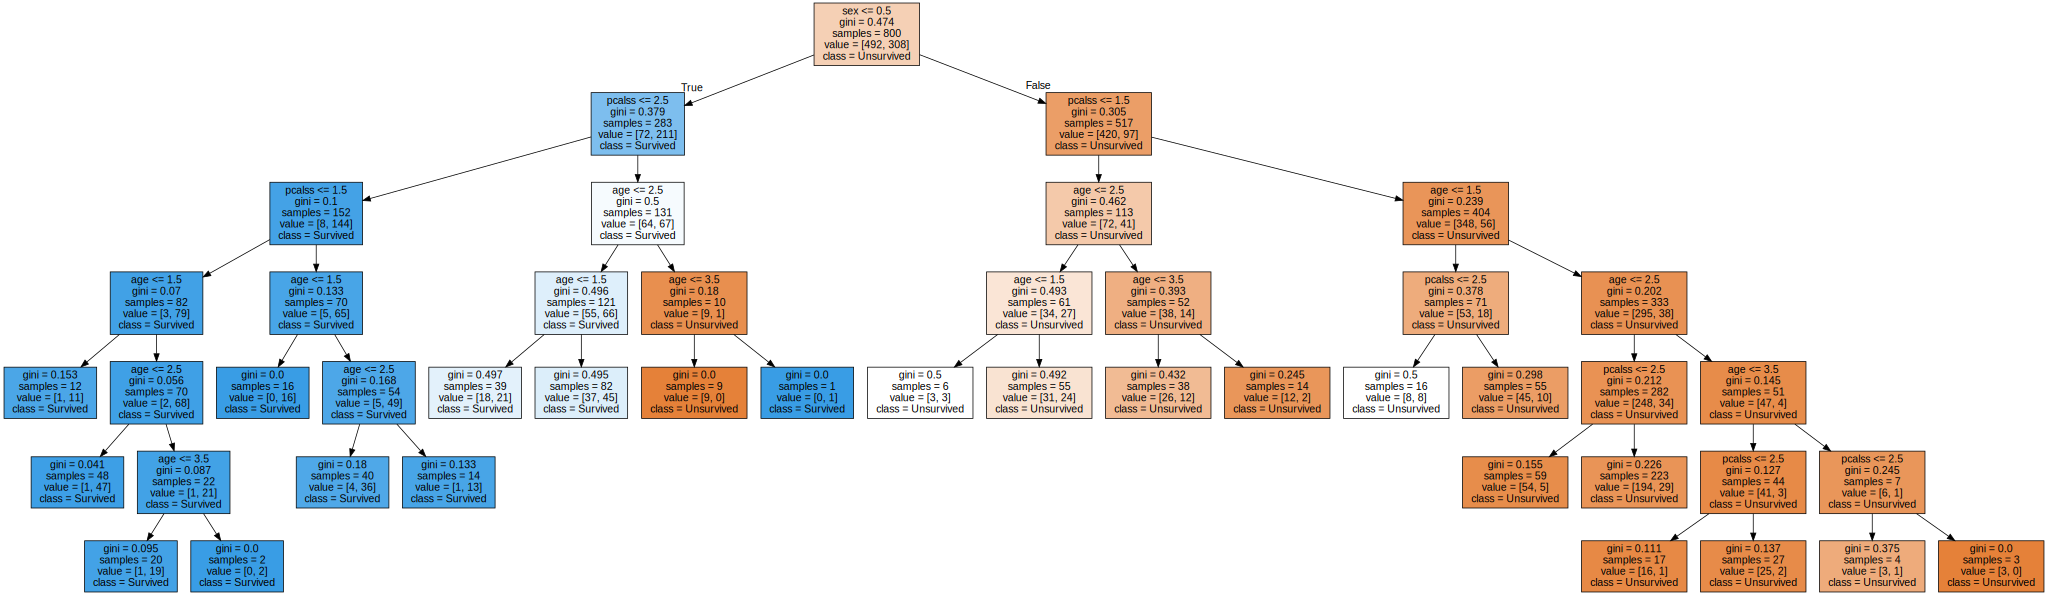

In [87]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree,
    out_file = 'titanic.dot',
    feature_names = ['pcalss','sex','age'],
    class_names = ['Unsurvived','Survived']
    ,filled = True
)

import graphviz

with open('titanic.dot') as f:
  dot_graph = f.read()



dot = graphviz.Source(dot_graph)
dot.format='png'

dot.render(filename='titanic_tree')

dot


#Bagging (RandomForest)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

rf.score(x_test,y_test)

0.7912087912087912

# XGBOOST(부스팅)

In [12]:
import xgboost as xgb

boosting_model = xgb.XGBClassifier(n_estimators=100)
boosting_model.fit(x_train,y_train)
boosting_model.score(x_test,y_test) 

0.7802197802197802